In [1]:
import pandas as pd
from google.colab import drive
import sqlite3
drive.mount('/content/drive')
dir_path = '/content/drive/MyDrive/CSS_project/data/'

Mounted at /content/drive


In [2]:
df = pd.read_csv(dir_path+'all_tweets_with_sentiment_and_gender_and_country_type.csv', index_col=0)
data = df[['tweet_id','emotion','author_id','gender','type']]
data['tweet_id'] = data['tweet_id'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
con = sqlite3.connect(dir_path+"queen.db", timeout=10)

In [ ]:
# con.execute("PRAGMA table_info('Retweets')").fetchall()
con.execute("PRAGMA table_info('Authors_country')").fetchall()
# con.execute("PRAGMA table_info('Authors')").fetchall()

[(0, 'author_id', 'TEXT', 1, None, 1), (1, 'country', 'TEXT', 1, None, 0)]

In [4]:
info_from_retweets = con.execute("""SELECT tweet_id, original_tweet_id, author_id from retweets""").fetchall()
info_from_retweets = pd.DataFrame(info_from_retweets).rename(columns={i:v for i,v in enumerate(['tweet_id','original_tweet_id','author_id'])})

In [ ]:
author_locations = con.execute("""SELECT * from authors_country""").fetchall()
author_locations = pd.DataFrame(author_locations).rename(columns={0:'author_id',1:'country'})

In [ ]:
author_gender = pd.read_csv(dir_path+'author_gender_WITH_LABEL.csv')
author_gender = author_gender[['author_id','gender']]
author_gender['author_id'] = author_gender.author_id.apply(str)

In [ ]:
info_from_retweets.head(2)

,tweet_id,original_tweet_id,author_id
0,1572375036727627778,1572361756286283777,1485659018626535433
1,1572375011758903297,1572325910908489728,4272845427


In [ ]:
author_locations.head(2)

,author_id,country
0,1469681896854597645,BR
1,1368266098508959744,US


In [ ]:
# join the above two
retweets_with_country = info_from_retweets.join(author_locations.set_index('author_id'), on='author_id').dropna()
retweets_with_country.head(2)

,tweet_id,original_tweet_id,author_id,country
6,1572374886965981184,1572177692635852813,1469681896854597645,BR
8,1572374878279327744,1572263882659598338,1368266098508959744,US


In [ ]:
# joining the above with gender
retweets_with_country_gender = retweets_with_country.join(author_gender.set_index('author_id'), on='author_id')
retweets_with_country_gender.head(2)

,tweet_id,original_tweet_id,author_id,country,gender
6,1572374886965981184,1572177692635852813,1469681896854597645,BR,F
8,1572374878279327744,1572263882659598338,1368266098508959744,US,M


In [ ]:
data.head(2)

,tweet_id,emotion,author_id,gender,type
Unnamed: 0,,,,,
0,1572368735440183297,sadness,1566773297798434818,M,Former British Colony (non-commonwealth)
1,1572368364311564288,joy,1473605424813203458,M,The Commonwealth Realm


In [ ]:
identified_retweets = retweets_with_country_gender.join(data.set_index('tweet_id')[['emotion']], on='original_tweet_id').dropna()

In [ ]:
identified_retweets.head()

,tweet_id,original_tweet_id,author_id,country,gender,emotion
8,1572374878279327744,1572263882659598338,1368266098508959744,US,M,fear
11,1572374851717058560,1570104122459701250,985783319643283456,GB,M,joy
33,1572374489677107200,1571563691442671617,3406032154,GB,F,joy
41,1572374324815822848,1571819781686235137,1186378998181515266,US,M,joy
49,1572374174596734977,1572368521996148738,1151976524398178305,US,M,sadness


In [ ]:
# identified_retweets.to_csv(dir_path + 'all_identified_retweets.csv')

In [ ]:
df_all = pd.read_csv(dir_path+'all_tweets_and_retweets.csv')

In [ ]:
df_all

,tweet_id,country,emotion,type,gender
0,1572368735440183297,IN,sadness,Former British Colony (non-commonwealth),M
1,1572368364311564288,AU,joy,The Commonwealth Realm,M
2,1572367957367349248,GH,anger,Former British Colony (non-commonwealth),F
3,1572367617146630145,AU,sadness,The Commonwealth Realm,F
4,1572361653458505728,GB,fear,UK,M
...,...,...,...,...,...
1079183,1567054829008322572,US,sadness,UK,F
1079184,1567054141884878848,PH,sadness,UK,M
1079185,1567048840401883136,ZA,joy,Former British Colony (non-commonwealth),M
1079186,1566986832528949248,CA,fear,The Commonwealth Realm,M


In [ ]:
con.execute('''select count(*) from tweets''').fetchall()

[(795645,)]

In [ ]:
con.execute('''select count(*) from retweets''').fetchall()

[(3637269,)]

In [ ]:
3637269+795645

4432914

In [ ]:
con.execute('''select count(*) from authors''').fetchall()

[(2460377,)]

In [ ]:
con.execute('''select count(*) from authors_country''').fetchall()

[(885057,)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender

In [ ]:
temp = pd.DataFrame(df_all.gender)
temp['count'] = 1

In [ ]:
import plotly.express as px
fig = px.pie(values=temp['count'], names=temp.gender)
fig.update_layout(title="Author count by gender", title_x=0.5)
fig.update_traces(textposition='inside',textinfo='percent+label', showlegend=False)

Output hidden; open in https://colab.research.google.com to view.

# tweet count by country

In [ ]:
# df_all.groupby(['type','emotion']).size().unstack()

In [ ]:
count_by_country = df_all.country.value_counts()
count_by_country

US    303900
GB    282910
CA     48418
NG     38943
AU     29986
       ...  
EH         2
BV         2
NF         1
NU         1
BQ         1
Name: country, Length: 239, dtype: int64

In [ ]:
import plotly.express as px
fig = px.pie(values=count_by_country, names=count_by_country.index)
fig.update_layout(title="Tweet count by country", title_x=0.5)
fig.update_traces(textposition='inside',textinfo='percent+label', showlegend=False)

In [ ]:
count_by_type = df_all.groupby('type').size()
fig = px.pie(values=count_by_type, names=count_by_type.index)
fig.update_layout(title="Tweet count by country type", title_x=0.5)
fig.update_traces(textposition='auto',textinfo='percent+label+value', showlegend=False)

# Add retweet label to the everything csv 'all_tweets_and_retweets.csv'

In [5]:
df = pd.read_csv(dir_path+'all_tweets_and_retweets.csv', index_col=0)

In [6]:
tweet_df = pd.read_csv(dir_path+'all_tweets_with_sentiment_and_gender_and_country_type.csv', index_col=0)
real_tweets = set(tweet_df['tweet_id'])

In [7]:
df['is_retweet'] = df['tweet_id'].apply(lambda x: not x in real_tweets)

# add ethnicity

In [8]:
eth = pd.read_csv(dir_path+ 'ethnicity_ethnicseer.csv',index_col=0)

In [9]:
# some names are missing!
eth_no_name = eth[eth.name.isna()]

In [10]:
# !pip install ethnicseer
from ethnicseer import EthnicClassifier
ec = EthnicClassifier.load_pretrained_model()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 13.7 MB/s 
     |████████████████████████████████| 886 kB 62.3 MB/s 


In [11]:
new_eth = ec.classify_names(eth_no_name['username'])

In [12]:
eth.loc[eth_no_name.index, 'eth_from_name'] = new_eth

In [13]:
eth = eth.rename(columns={'eth_from_name':'ethnicity'})

In [14]:
con = sqlite3.connect(dir_path+"queen.db", timeout=10)

In [ ]:
con.execute("PRAGMA table_info('Retweets')").fetchall()

[(0, 'tweet_id', 'TEXT', 1, None, 1),
 (1, 'original_tweet_id', 'TEXT', 1, None, 0),
 (2, 'author_id', 'TEXT', 1, None, 0),
 (3, 'original_author_id', 'TEXT', 1, None, 0),
 (4, 'country', 'TEXT', 0, None, 0),
 (5, 'retweet_count', 'INTEGER', 0, None, 0),
 (6, 'reply_count', 'INTEGER', 0, None, 0),
 (7, 'like_count', 'INTEGER', 0, None, 0),
 (8, 'quote_count', 'INTEGER', 0, None, 0)]

In [15]:
tweets_info = con.execute('select tweet_id, author_id, retweet_count, reply_count, like_count, quote_count from tweets').fetchall()
retweets_info = con.execute('select tweet_id, author_id, retweet_count, reply_count, like_count, quote_count from retweets').fetchall()

In [16]:
tweets_info = pd.DataFrame(tweets_info, columns=['tweet_id','author_id','retweet_count','reply_count','like_count','quote_count'])
retweets_info = pd.DataFrame(retweets_info, columns=['tweet_id','author_id','retweet_count','reply_count','like_count','quote_count'])
# tweets_info['is_retweet'] = False
# retweets_info['is_retweet'] = True

In [17]:
temp = pd.concat([tweets_info, retweets_info])
temp['tweet_id'] = temp.tweet_id.apply(int)

In [18]:
everything = df.join(temp.set_index('tweet_id'), on='tweet_id')
everything['author_id'] = everything.author_id.apply(int)

In [19]:
everything_with_eth = everything.join(eth.set_index('author_id'), on ='author_id')

In [20]:
group_to_eth = { 'European': ['ger','frn','ita','rus'], 
          'Asian': ['jap','chi','kor','vie'],
          'Arab': ['mea'],
          'Hispanic': ['spa'],
          'Indian': ['ind'],
          'English':['eng']}
eth_to_group = {e:g for g in group_to_eth for e in group_to_eth[g]}

In [21]:
everything_with_eth['ethnicity_group'] = everything_with_eth.ethnicity.apply(lambda x: eth_to_group[x])

In [22]:
df_save = everything_with_eth[['tweet_id','country','type','emotion','is_retweet','author_id','gender','ethnicity','ethnicity_group',
                'retweet_count','reply_count','like_count','quote_count']]
df_save['type'] = df_save['type'].replace({'Former British Colony (non-commonwealth)':'FBC','The Commonwealth Realm':'TCR',
                  'UK':'UK','US':'US','Other Colonies (not colonized by the UK)':'OC', 'Others':'Others'})                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
df_save.head(5)

,tweet_id,country,type,emotion,is_retweet,author_id,gender,ethnicity,ethnicity_group,retweet_count,reply_count,like_count,quote_count
0,1572368735440183297,IN,FBC,sadness,False,1566773297798434818,M,mea,Arab,0,0,1,0
1,1572368364311564288,AU,TCR,joy,False,1473605424813203458,M,eng,English,0,0,0,0
2,1572367957367349248,GH,FBC,anger,False,4795175683,F,rus,European,0,0,0,0
3,1572367617146630145,AU,TCR,sadness,False,357251581,F,eng,English,0,0,0,0
4,1572361653458505728,GB,UK,fear,False,1533820422860464131,M,eng,English,0,0,0,0


In [25]:
# df_save.to_csv(dir_path+'all_tweets_and_retweets_1127.csv')

In [31]:
len(set(df_save['tweet_id'])), len(set(df_save['author_id']))

(1067665, 680687)

Like count?

In [ ]:
tweet_like_count = df_save[~df_save.is_retweet].like_count

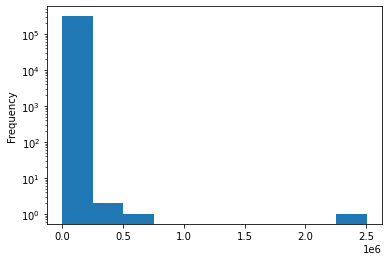

In [ ]:
tweet_like_count.plot(kind='hist', log=True)

In [ ]:
pd.DataFrame(tweet_like_count).groupby('like_count').size()

like_count
0          137914
1           52564
2           26142
3           16073
4           11127
            ...  
215798          1
258788          1
484727          1
552943          1
2502634         1
Length: 1760, dtype: int64

In [ ]:
df = df_save

In [ ]:
df[df.like_count>2000000]

,tweet_id,country,type,emotion,is_retweet,author_id,gender,ethnicity,retweet_count,reply_count,like_count,quote_count
300256,1567928275913121792,GB,UK,sadness,False,36042554,F,eng,701835,88580,2502634,260166


eng    402155
ger    133583
ind    121174
frn     85954
ita     82233
spa     70361
jap     57837
mea     42947
chi     33217
rus     29104
kor      7092
vie      2008
Name: ethnicity, dtype: int64

Check coorelation between country and ethnicity

In [ ]:
from scipy.stats.contingency import association
import numpy as np
import seaborn as sns

In [ ]:
# temp = df[['ethnicity','country']].value_counts().unstack().fillna(0).astype(int)
temp = df[['ethnicity','type']].value_counts().unstack().fillna(0).astype(int)
association(temp, method="cramer", correction=True)

0.17339773734446917

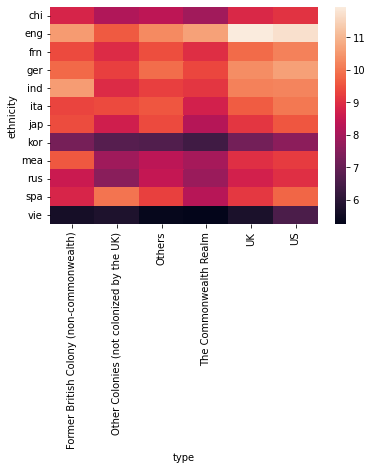

In [ ]:
sns.heatmap(np.log(temp))

In [ ]:
df_plot = pd.DataFrame(df[df['type']=='UK'].groupby('ethnicity')['emotion'].value_counts(normalize=True)).mul(100).rename(columns={'emotion':'percent'}).reset_index().set_index(['ethnicity','emotion'])

In [ ]:
df_plot

percent
ethnicity emotion            
chi       sadness   58.662656
          anger     17.571448
          joy       17.051826
          fear       4.115958
          love       2.037468
...                       ...
vie       anger     21.794872
          joy       18.589744
          fear       2.564103
          love       1.282051
          surprise   0.320513

[72 rows x 1 columns]

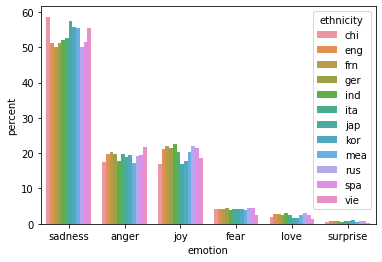

In [ ]:
sns.barplot(data=df_plot.reset_index(), x='emotion',y='percent',hue='ethnicity')

Ethnicity group?

In [ ]:
eth_map = {'chi':'Asian', 'eng':'Eng'}